In [1]:
import os, sys
import glob
sys.path.append('/Users/bryanbrzycki/Documents/Spring 2018/blossom')
sys.path.append('../')

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from blossom import *
from flowerpot import *

In [2]:
organism_list = DatasetIO.load_organism_dataset('/Users/bryanbrzycki/Documents/Spring 2018/blossom/scripts/datasets/test_drinking/organisms_ds0010.txt')
organism_list

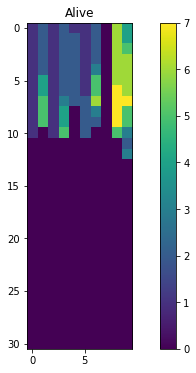

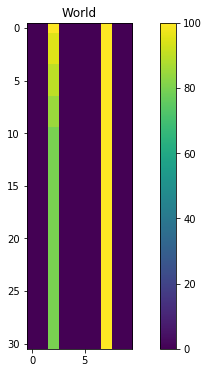

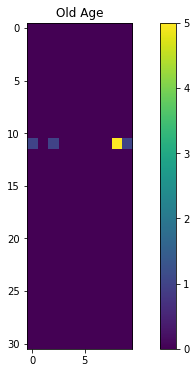

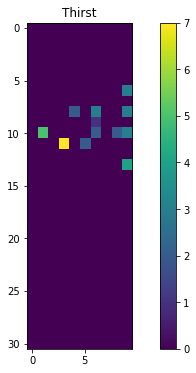

In [3]:
import json

time = 30
size = 10

alive_image = []
old_age_image = []
thirst_image = []
world_image = []
for i in range(time + 1):
    organism_path = '/Users/bryanbrzycki/Documents/Spring 2018/blossom/scripts/datasets/test_general/organisms_ds%04d.txt' % i
    world_path = '/Users/bryanbrzycki/Documents/Spring 2018/blossom/scripts/datasets/test_general/world_ds%04d.txt' % i
#     organism_list = DatasetIO.load_organism_dataset()
#     world = DatasetIO.load_world_dataset()
    
    with open(organism_path, 'r') as f:
        organism_list = json.load(f)
    with open(world_path, 'r') as f:
        world = json.load(f)
    
    
    alive = []
    old_age = []
    thirst = []
    for organism in organism_list:
        if organism['alive']:
            alive.append(organism['position'])
        elif organism['cause_of_death'] == 'old_age':
            old_age.append(organism['position'])
        elif organism['cause_of_death'] == 'thirst':
            thirst.append(organism['position'])
        else:
            print('Something\'s wrong!')

    alive_weights = np.zeros(size)
    for position in alive:
        index = position[0]
        alive_weights[index] += 1
        
    old_age_weights = np.zeros(size)
    for position in old_age:
        index = position[0]
        old_age_weights[index] += 1
        
    thirst_weights = np.zeros(size)
    for position in thirst:
        index = position[0]
        thirst_weights[index] += 1
        
    alive_image.append(alive_weights)
    old_age_image.append(old_age_weights)
    thirst_image.append(thirst_weights)
    
    world_image.append(world['water'])

# plt.imshow(weights[np.newaxis,:])
# Plot alive
fig = plt.figure(figsize=(10, 6))
plt.imshow(alive_image)
plt.colorbar()
plt.title('Alive')
plt.show()

# Plot world
fig = plt.figure(figsize=(10, 6))
plt.imshow(world_image)
plt.colorbar()
plt.title('World')
plt.show()

# Plot old age
fig = plt.figure(figsize=(10, 6))
plt.imshow(old_age_image)
plt.colorbar()
plt.title('Old Age')
plt.show()

# Plot thirst
fig = plt.figure(figsize=(10, 6))
plt.imshow(thirst_image)
plt.colorbar()
plt.title('Thirst')
plt.show()

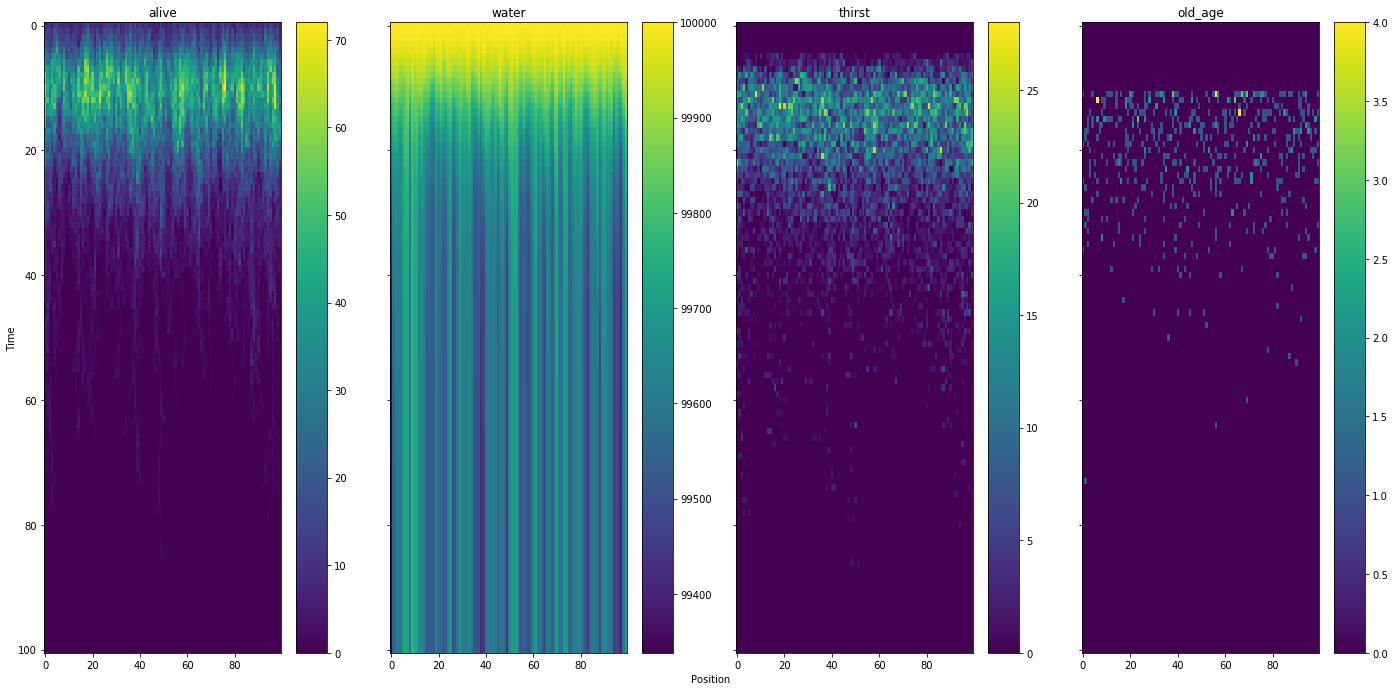

In [28]:
time = 100

org_fields = ['alive', 'old_age', 'thirst']
world_fields = ['water']
organism_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Spring 2018/blossom/scripts/datasets/test_general/organisms_ds????.txt'))
world_paths = sorted(glob.glob('/Users/bryanbrzycki/Documents/Spring 2018/blossom/scripts/datasets/test_general/world_ds????.txt'))

# for field in org_fields:
#     plot_organism_field(time, organism_paths, world_paths, field)
# for field in world_fields:
#     plot_world_field(time, world_paths, field)
    
fig, axes = plt.subplots(1, 4, sharey='row', figsize=(20,10))
(ax1, ax2, ax3, ax4) = axes
plt.sca(ax1)
plot_organism_field(time, organism_paths, world_paths, 'alive')
plt.sca(ax2)
plot_world_field(time, world_paths, 'water')
plt.sca(ax3)
plot_organism_field(time, organism_paths, world_paths, 'thirst')
plt.sca(ax4)
plot_organism_field(time, organism_paths, world_paths, 'old_age')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)

plt.xlabel('Position')
plt.ylabel('Time')
for ax in axes:
    plt.sca(ax)
    plt.tick_params(labelcolor='black', top=False, bottom=True, left=True, right=False)

# fig.subplots_adjust(wspace = 0.5)
plt.tight_layout()
    
plt.show()